In [117]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease/heartdisease.csv


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('/kaggle/input/heart-disease/heartdisease.csv')

In [120]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [121]:
## Null check
df.isnull().sum().sum()

645

In [127]:
## Filing the Nan values
df.dropna(axis = 1 , how = 'any' , inplace = True)

In [128]:
df.isnull().sum().sum()

0

In [129]:
shuffle_df = df.sample(frac = 1)

In [130]:
shuffle_df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
736      1   41        2.0              1        20.0     0.0   
1087     0   40        2.0              1        10.0     0.0   
2569     0   52        1.0              0         0.0     0.0   
2302     1   37        4.0              0         0.0     0.0   
300      1   38        1.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
736                 0             1         0    196.0  147.5   92.5  22.72   
1087                0             0         0    216.0  112.5   76.5  27.22   
2569                0             1         0    215.0  180.0  108.0  37.02   
2302                0             1         0    230.0  123.0   92.0  28.61   
300                 0             0         0    319.0  121.0   86.0  29.77   

      heartRate  glucose  TenYearCHD  
736        75.0     71.0           0  
1087       75.0     77.0           0  
2569       60.0     89.0           0  
2302       71.0     80.0           0  
300        72.0     77.0           0

In [131]:
## Visualising our data
Y = shuffle_df.iloc[:,-1]
caught_disease = shuffle_df.loc[Y==1]
not_caught_disease = shuffle_df.loc[Y==0]

plt.ylabel('Age')
plt.xlabel('BMI')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,12],caught_disease.iloc[:100,1] , s = 10 , c = 'orange' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,12],not_caught_disease.iloc[:100,1] , s = 10 , c = 'blue' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

plt.ylabel('Total Cholestrol')
plt.xlabel('No. of Cigrattes per Day')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,4],caught_disease.iloc[:100,10] , s = 10 , c = 'green' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,4],not_caught_disease.iloc[:100,10] , s = 10 , c = 'red' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

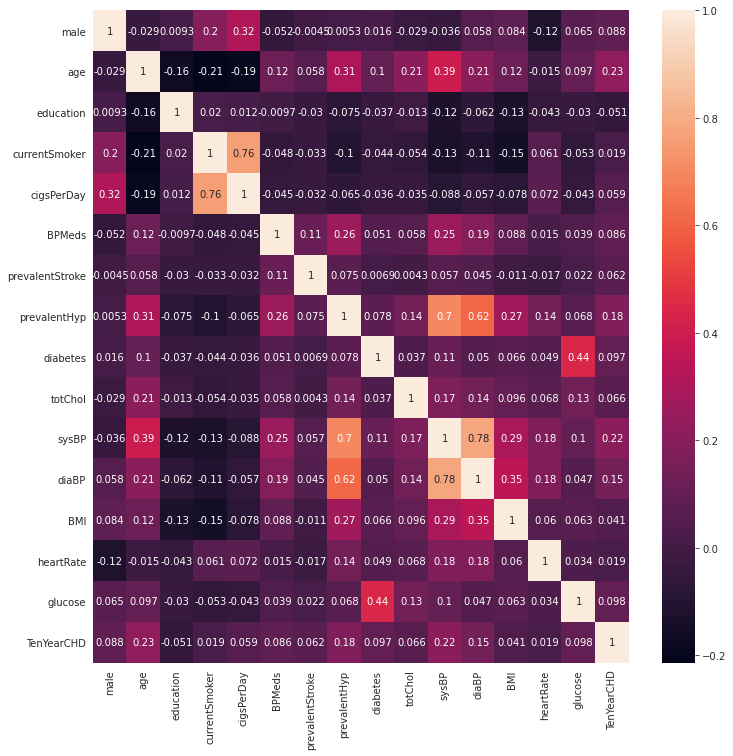

In [132]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


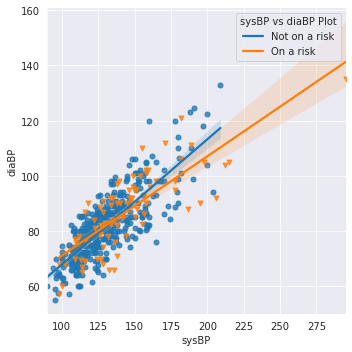

In [133]:
sns.set_style('darkgrid')
sns.lmplot(x = 'sysBP' , y = 'diaBP' , data = df[:500] , hue = 'TenYearCHD' , markers = ['o','v'] , scatter_kws={'s':25} , legend = False)
plt.legend(title = 'sysBP vs diaBP Plot' , loc = 'upper_left' , labels = ['Not on a risk','On a risk'])
plt.show()

In [134]:
y = shuffle_df.iloc[:,-1].values.reshape(-1,1)
x = shuffle_df.iloc[:,:-1].values.reshape(-1,15)

train_size = int(0.7* len(shuffle_df))

In [135]:
## Normalized the data
for i in range(15):
    x[:,i] = (x[:,i] - min(x[:,i])) / (max(x[:,i]) - min(x[:,i]))

In [136]:
x

array([[1.        , 0.23684211, 0.5       , ..., 0.4       , 0.52447552,
        0.18020305],
       [0.        , 0.21052632, 0.5       , ..., 0.47922535, 0.52447552,
        0.19543147],
       [0.        , 0.52631579, 0.25      , ..., 0.65176056, 0.41958042,
        0.22588832],
       ...,
       [1.        , 0.76315789, 0.25      , ..., 0.5040493 , 0.39160839,
        0.2284264 ],
       [1.        , 0.81578947, 0.25      , ..., 0.41760563, 0.46853147,
        0.17005076],
       [1.        , 0.52631579, 0.75      , ..., 0.54911972, 0.67132867,
        0.21827411]])

In [137]:
## Splitting dataset into train and test
X_train , X_test , y_train , y_test = x[:train_size] , x[train_size:] , y[:train_size] , y[train_size:]

In [138]:
X_train

array([[1.        , 0.23684211, 0.5       , ..., 0.4       , 0.52447552,
        0.18020305],
       [0.        , 0.21052632, 0.5       , ..., 0.47922535, 0.52447552,
        0.19543147],
       [0.        , 0.52631579, 0.25      , ..., 0.65176056, 0.41958042,
        0.22588832],
       ...,
       [0.        , 0.81578947, 0.25      , ..., 0.575     , 0.52447552,
        0.21319797],
       [0.        , 0.97368421, 0.75      , ..., 0.4471831 , 0.53846154,
        0.20304569],
       [0.        , 0.36842105, 0.75      , ..., 0.40739437, 0.41958042,
        0.1751269 ]])

In [139]:
## Preping our data
ones = np.ones([X_train.shape[0],1] , dtype = np.float128)
X_train = np.concatenate((ones,X_train),axis=1)
theta = np.zeros([1,X_train.shape[1]], dtype = np.float128)


In [140]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [141]:
def compute_cost(X, y, theta):
    m = len(y)
    
    h = sigmoid(X @ theta.T)
    epsilon = 1e-5
    cost = 1/m * np.sum((-y).T @ np.log(sigmoid(X @ theta.T)) - (1-y).T @ np.log(1 - sigmoid(X @ theta.T )))
    return cost

In [142]:
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    
    costing = np.zeros((iters,1))

    for i in range(iters):
        ALPHA = sigmoid(X @theta.T)
        BETA = (ALPHA - y).T
        SIGMA = alpha/m * (BETA @ X)
        theta = theta - SIGMA
        costing[i] = compute_cost(X, y, theta)

    return theta , costing

In [149]:
def predict(X, theta,thresh):
    a = sigmoid(X @ theta.T)
    b = (a>thresh).astype(int)
        
    
    return b

In [150]:


alpha = 0.09
iters = 1000

initial_cost = compute_cost(X_train, y_train, theta)




In [171]:
THETA , costing = gradient_descent(X_train, y_train, theta, alpha, iters)

thresh = (sigmoid(X_train @ THETA.T)).mean()
y_pred = predict(X_train, THETA,thresh)

print(y_pred)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


In [172]:
def stat(y_pred,y_train):
    tp,tn,fp,fn = [0 for _ in range(4)]

    for i in range(len(y_pred)):
        if(y_pred[i]==1. and y_train[i]==1.):
            tp+=1
        if(y_pred[i]==0. and y_train[i]==0.):
            tn+=1
        if(y_pred[i]==1. and y_train[i]==0.):
            fp+=1
        if(y_pred[i]==0. and y_train[i]==1.):
            fn+=1
            
    return tp,tn,fp,fn
    
    

In [173]:
Rec = []
Prec = []
for i in range(0,100,5):
    thresh = float(i/100)
    tpr,fpr = float(0),float(0)
    y_pred_temp = predict(X_train,THETA,thresh)
    tp,tn,fp,fn = stat(y_pred_temp,y_train)
    if (tp+fn)!=0:
        tpr = tp/(tp+fn)
    if (tp+fp)!=0:
        fpr = tp/(tp+fp)
    Rec.append(tpr)
    Prec.append(1-fpr)

print(Rec,Prec)

[1.0, 1.0, 0.8906605922551253, 0.6537585421412301, 0.45785876993166286, 0.275626423690205, 0.11617312072892938, 0.04783599088838269, 0.02050113895216401, 0.002277904328018223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.8519892110586649, 0.8519892110586649, 0.819815668202765, 0.7582139848357203, 0.7086956521739131, 0.6601123595505618, 0.6622516556291391, 0.5333333333333333, 0.25, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [174]:
Rec = np.array(Rec)
Prec = np.array(Prec)
print(Rec,Prec)

[1.         1.         0.89066059 0.65375854 0.45785877 0.27562642
 0.11617312 0.04783599 0.02050114 0.0022779  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ] [0.85198921 0.85198921 0.81981567 0.75821398 0.70869565 0.66011236
 0.66225166 0.53333333 0.25       0.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


In [182]:
xaxis=np.arange(0.0, 1, 0.05)
fig, p = plt.subplots(1,1)
p.plot(Prec,Rec,marker = 'o')
p.set_title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [156]:
## Testing For new Values
ones = np.ones([X_test.shape[0],1] , dtype = np.float128)
X_test = np.concatenate((ones,X_test),axis=1)

NEW = predict(X_test,THETA,thresh)
ANS = []
for i in NEW:
    if i == 1.0:
        ANS.append('ON RISK')
    else:
        ANS.append('NOT ON RISK')
ANS

TypeError: predict() missing 1 required positional argument: 'thresh'